# Job Posting Analysis - DS Indeed Job Posts.

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
from time import sleep
from random import randint
import pandas as pd
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
import seaborn as sns
import folium

In [7]:
# First we check if we are allowed to do a web scrapping.
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url('https://www.indeed.com/robots.txt')
rp.read()
rp.can_fetch('*','https://www.indeed.com/jobs?q=data+scientist&l=CA&fromage=14')

True

In [3]:
# We create empyt lists 
titles = []
companies = []
locations = []
summaries = []
descriptions = []

In [4]:
home = "https://www.indeed.com"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver = webdriver.Chrome()

# We create the pages.
pages = np.arange(0,221,10)
for page in pages:
    # We increment by 10 so that the page number changes. 
    url = "https://www.indeed.com/jobs?q=data+scientist&l=CA&fromage=14&start="+str(page)    
    # We get the data using the url that will change from 10,20,30...90
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    job_containers = soup.find_all('div',{'class':'jobsearch-SerpJobCard unifiedRow row result clickcard'})
    #detail_descr_containers = soup.find_all('div',{'class':'jobsearch-SerpJobCard unifiedRow row result clickcard vjs-highlight'})
    # We add this function so we have a pause in between the requests. 
    sleep(randint(6,20))

    # We iterate over the job containers.
    for i in job_containers:
        # Get the job title.
        job_info1 = i.find('h2',{'class':'title'})
        job_title = job_info1.find('a').text

        # Get the company name.
        company_info1 = i.find('div',{"class":"sjcl"})
        company_name = company_info1.find('span',{"class":'company'}).text

        # Get the location. Check if location is in either a span or div tag.
        location_info1 = i.find('div',{"class":"sjcl"})
        if location_info1.find('div',{'class':'location accessible-contrast-color-location'}) is not None:
            location_name = location_info1.find('div',{'class':'location accessible-contrast-color-location'}).text
        else:
            location_name = location_info1.find('span',{'class':'location accessible-contrast-color-location'}).text

        # Get the job summary. 
        job_summary = i.find('ul').text

        sleep(randint(1,10))
        # Get the job descriptin.
        href = i.find('a',{"class":"jobtitle turnstileLink"}).get('href')
        link = home+href
        job_descr_req = driver.get(link)
        job_descr_soup = BeautifulSoup(driver.page_source, 'html.parser')
        try:
            job_descr = job_descr_soup.find('div',{'class':'jobsearch-jobDescriptionText'}).text.lower()
        except AttributeError:
            continue

        # Append the data to the lists
        titles.append(job_title)
        companies.append(company_name)
        locations.append(location_name)
        summaries.append(job_summary)
        descriptions.append(job_descr)
                
driver.quit

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/navidmashinchi/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


<bound method WebDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="44d67b53c343df9c0ac8f29eff6b0bc7")>>

In [5]:
# We clean the data and strip down the \n's.
titles_list = list(map(str.strip,titles))
companies_list = list(map(str.strip,companies))
locations_list = list(map(str.strip,locations))
summaries_list = list(map(str.strip,summaries))
descprions_list = list(map(str.strip,descriptions))

# Get rid of the zip codes and State.
locations_list_cleaned = []
for i in range(len(locations_list)):
    locations_list[i].split(',')
    x2 = locations_list[i].split(',')
    locations_list_cleaned.append(x2[0])

    
# We create a dictionary
dic = {"Title": titles_list,"Company":companies_list,"Location":locations_list_cleaned,"Summary":summaries_list,"Description": descprions_list}
# We create a pandas dataframe
df = pd.DataFrame(dic)


In [6]:
# Save the data frame:
df.to_pickle("indeed_job_ca2.pkl")

In [122]:
#Read the file
pd.read_pickle("/Users/navidmashinchi/Desktop/JupyterNotebook/DS Tools 1 /Assignments/indeed_job_ca2.pkl")

,Title,Company,Location,Summary,Description
0,Data Scientist (Marketing); World's Largest So...,Tailored Management,Menlo Park,"Apply knowledge of statistics, machine learnin...",job description: summary:marketing decision sc...
1,Spectroscopic Data Scientist,BayArea101,San Jose,Responsibilities include: spectral data extrac...,a sf bay area medical device company is seekin...
2,Data Scientist,"RMDS Lab, Inc",Pasadena,Provide consultation on data science and machi...,about rmds labrmds lab and its global associat...
3,Data Scientist,Pollen,Los Angeles,"Collaborate with other insights professionals,...",description\n\nas an early member of our insig...
4,Data Scientist,PennyMac,Westlake Village,Support project leads to identify valuable dat...,overview:\n\nthe data scientist provides data ...
...,...,...,...,...,...
335,Senior Applied AI ML Engineer,"JPMorgan Chase Bank, N.A.",Palo Alto,Candidates must have a strong curiosity for da...,we are looking for a data scientist/ml enginee...
336,Group Manager - Data Science,Intuit,Mountain View,Lead and create a team of data scientists.\nMe...,overview\nintuit is seeking a group manager to...
337,Data Analyst - Talent Acquisition,Kelly,Foster City,Create an environment of strong customer servi...,kelly it is hiring a data analyst - talent acq...
338,Data Scientist (W2 Contract),Ascent Services Group,Oakland,Experience creating and using advanced machine...,please contact meera makam at 925 627 4935 or ...


In [224]:
df = pd.read_pickle("/Users/navidmashinchi/Desktop/JupyterNotebook/DS Tools 1 /Assignments/indeed_job_ca2.pkl")

In [225]:
# Add tools columns:
tools = ['python', 'pytorch', 'sql', 'pyspark', 'aws','spark', 'sas', 'nosql','salesforce','tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'scipy', 'numpy', 'matplotlib','spss', 'linux', 'azure', 'cloud', 'mongodb', 'mysql', 'oracle','snowflake', 'kafka', 'javascript', 'jupyter', 'perl', 'bigquery', 'unix', 'react', 'scikit', 'powerbi', 'lambda', 'ssrs', 'django','seaborn', 'github', 'git', 'splunk','rapidminer','jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'hadoop','angular', 'nltk', 'flask', 'node', 'firebase','php', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'ruby', 'tensor','dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','rcrawler','caret','rmarkdown','plotly','stringr','swirl']

for i in tools:
    df[i]=df["Description"].str.find(i.lower())>0

In [226]:
# Add skills columns:
skills = ['statistics', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory','recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics','knn', 'outlier', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting','clustering', 'cluster', 'optimization', 'visualization', 'nlp',
 'regression', 'logistic', 'boosting', 'recurrent', 'convolutional', 'bayesian','bayes','random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design', 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction','text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining']

for i in skills:
    df[i]=df["Description"].str.find(i.lower())>0

In [227]:
# We look for the r programming language in the job description.
target = 'r'
r_lst = []
x = df.Description.str.lower()
for i in x:
    split_sent = set(i.split())
    x = set('r'.split()) & split_sent
    if len(x) != 0:
        r_lst.append(True)
    else:
        r_lst.append(False)
df['r']=r_lst

In [228]:
# Add min degree requirements columns:
degree_dict = {'bachelor': 1, 'Bachelor': 1,
               'bachelor\s/': 1,'Bachelor\s/': 1, 
               'undergraduate': 1, 'Undergraduate': 1, 
               'master': 2,'Master': 2,'master\'s/': 2, 
               'Master\'s/': 2,'m.s.': 2,'M.S.': 2 ,'m.s': 2,'M.S': 2 , 'ms/': 2,'MS/': 2,
               'm.s/': 2,'M.S/': 2, 'm.s./': 2, 'M.S./': 2, 'master/': 2, 'Master/': 2, 
               'graduate': 2,'Graduate': 2, 
               'phd': 3, 'PHD': 3, 'ph.d': 3,'PH.D': 3,'phd/': 3,'PHD/': 3,
               'doctoral': 3,'Doctoral': 3, 'doctorate': 3,'Doctorate': 3,
               'advanced degree': 2,'Advanced Degree': 2,
               'ms degree': 2,'MS Degree': 2, 
               '4 year degree': 1,'4 Year Degree': 1,'4-year degree': 1,'4-Year Degree': 1, 
               'graduate degree':2,'Graduate Degree':2}

# Create an empty list for the values of the degrees
degree_val_lst = []

# We grab the texts from all the descriptions
description_lst = df["Description"].values

# Create an empty list for the splitted descriptions
splitted_descr_lst = []

# Split all the lists into nested lists
for i in description_lst:
    splitted_descr_lst.append(i.split())

#We loop over all the splitted descriptions.
for i in range(len(splitted_descr_lst)):
    # Set up nested list
    degree_val_lst.append([])
    # Loop over degree_dict and check if the keys come up in the description.
    for k,v in degree_dict.items():
        if k in splitted_descr_lst[i]:
            #print(k)
            degree_val_lst[i].append(v)
    # If none of the keys are in there we add a 0 which represents that no degrees have been specified    
    degree_val_lst[i].append(0)

# Now we grab the min number for each index inside the degree_val_lst
min_lst_edu = []

# We loop over the degree_val_lst
for i in degree_val_lst:
    # Check if the len of the index is 1. If so we just grab that number and append it to min_lst_edu
    if len(i) == 1:
        x = str(i)[1:-1] 
        min_lst_edu.append(int(x))
    # Else we take the min education requirement number.
    else:
        min_lst_edu.append(sorted(i)[1])

df["Minimum Education"] = min_lst_edu


In [229]:
# We now change the integers inside the min education column to the strings.
df["Minimum Education"].replace({0:'Not Specified'}, inplace = True)
df["Minimum Education"].replace({1:'Bachelor\'s Degree'}, inplace = True)
df["Minimum Education"].replace({2:'Master\'s Degree'}, inplace = True)
df["Minimum Education"].replace({3:'Doctoral Degree'}, inplace = True)
df

,Title,Company,Location,Summary,Description,python,pytorch,sql,pyspark,aws,...,machine vision,dimensionality reduction,text analytics,power bi,a/b testing,ab testing,chat bot,data mining,r,Minimum Education
0,Data Scientist (Marketing); World's Largest So...,Tailored Management,Menlo Park,"Apply knowledge of statistics, machine learnin...",job description: summary:marketing decision sc...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Not Specified
1,Spectroscopic Data Scientist,BayArea101,San Jose,Responsibilities include: spectral data extrac...,a sf bay area medical device company is seekin...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Master's Degree
2,Data Scientist,"RMDS Lab, Inc",Pasadena,Provide consultation on data science and machi...,about rmds labrmds lab and its global associat...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,Not Specified
3,Data Scientist,Pollen,Los Angeles,"Collaborate with other insights professionals,...",description\n\nas an early member of our insig...,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,Not Specified
4,Data Scientist,PennyMac,Westlake Village,Support project leads to identify valuable dat...,overview:\n\nthe data scientist provides data ...,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,Master's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Senior Applied AI ML Engineer,"JPMorgan Chase Bank, N.A.",Palo Alto,Candidates must have a strong curiosity for da...,we are looking for a data scientist/ml enginee...,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,Not Specified
336,Group Manager - Data Science,Intuit,Mountain View,Lead and create a team of data scientists.\nMe...,overview\nintuit is seeking a group manager to...,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,Doctoral Degree
337,Data Analyst - Talent Acquisition,Kelly,Foster City,Create an environment of strong customer servi...,kelly it is hiring a data analyst - talent acq...,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Not Specified
338,Data Scientist (W2 Contract),Ascent Services Group,Oakland,Experience creating and using advanced machine...,please contact meera makam at 925 627 4935 or ...,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,Master's Degree


In [230]:
# We have to correct a few Locations manually and clean the data accordingly.

# Change United States to Irvine.
df.at[66,'Location'] = "Irvine"
df.at[77,'Location'] = "Irvine"
df.at[217,'Location'] = "Irvine"
df.at[234,'Location'] = "Irvine"
df.at[253,'Location'] = "Irvine"
df.at[266,'Location'] = "Irvine"
df.at[279,'Location'] = "Irvine"
df.at[294,'Location'] = "Irvine"
df.at[307,'Location'] = "Irvine"

# Change San Francisco Bay Area to San Francisco
df.at[130,'Location'] = "San Francisco"
df.at[199,'Location'] = "San Francisco"
df.at[215,'Location'] = "San Francisco"
df.at[236,'Location'] = "San Francisco"

# Change South San Francisco to San Francisco
df.at[13,'Location'] = "San Francisco"
df.at[15,'Location'] = "San Francisco"
df.at[126,'Location'] = "San Francisco"

# Change California to San Francisco 
df.at[101,'Location'] = "San Francisco"
df.at[136,'Location'] = "San Francisco"
df.at[244,'Location'] = "San Francisco"

# Change California to Edwards 
df.at[145,'Location'] = "San Francisco"

# Change East Palo Alto to Palo Alto 
df.at[260,'Location'] = "Palo Alto"

# Change Santa Clara Valley to Santa Clara
df.at[131,'Location'] = "Santa Clara"
df.at[146,'Location'] = "Santa Clara"
df.at[157,'Location'] = "Santa Clara"
df.at[161,'Location'] = "Santa Clara"
df.at[227,'Location'] = "Santa Clara"

#df.loc[df['Location'] == 'Santa Clara Valley']

In [231]:
# We grab the population data from the year 2020.
cities_pop = pd.read_html('https://worldpopulationreview.com/states/cities/california', header = 0)
df_pop = cities_pop[0]
df_pop = df_pop.rename(columns={"2020 Pop": "Population"})

# We create a dictionary where keys are city and the value is the population number.
pop_dict = pd.Series(df_pop.Population.values,index=df_pop.Name).to_dict()
pop_dict

{'Los Angeles': 4015940,
 'San Diego': 1447100,
 'San Jose': 1033670,
 'San Francisco': 896047,
 'Fresno': 538195,
 'Sacramento': 521769,
 'Long Beach': 463218,
 'Oakland': 435224,
 'Bakersfield': 390233,
 'Anaheim': 352911,
 'Riverside': 336285,
 'Santa Ana': 330389,
 'Stockton': 316996,
 'Irvine': 303956,
 'Chula Vista': 277289,
 'Fremont': 239525,
 'Modesto': 218758,
 'Fontana': 218573,
 'San Bernardino': 217671,
 'Moreno Valley': 212992,
 'Oxnard': 212715,
 'Santa Clarita': 210543,
 'Glendale': 204765,
 'Huntington Beach': 201941,
 'Ontario': 186653,
 'Rancho Cucamonga': 180031,
 'Elk Grove': 177406,
 'Santa Rosa': 177132,
 'Oceanside': 176950,
 'Corona': 171213,
 'Garden Grove': 170328,
 'Hayward': 161314,
 'Lancaster': 158627,
 'Palmdale': 156299,
 'Salinas': 155619,
 'Sunnyvale': 152427,
 'Pomona': 152405,
 'Escondido': 152245,
 'Roseville': 143921,
 'Torrance': 143912,
 'Pasadena': 141695,
 'Orange': 138816,
 'Fullerton': 138200,
 'Visalia': 137272,
 'Concord': 130664,
 'Santa 

In [232]:
# We create a list of the locations in the dataset
df_loc_lst = list(df.Location.values)
pop_lst = []

# Iterated of the list of locations in the dataset.
for i in df_loc_lst:
    try:
        # Append the population to the pop_lst
        pop_lst.append(pop_dict[i])
    except KeyError:
        # If it doesn't have the city in the data that we scraped we just add 0
        pop_lst.append(0)
        continue

# Create a new column
df["Population"] = pop_lst
df 

,Title,Company,Location,Summary,Description,python,pytorch,sql,pyspark,aws,...,dimensionality reduction,text analytics,power bi,a/b testing,ab testing,chat bot,data mining,r,Minimum Education,Population
0,Data Scientist (Marketing); World's Largest So...,Tailored Management,Menlo Park,"Apply knowledge of statistics, machine learnin...",job description: summary:marketing decision sc...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Not Specified,34949
1,Spectroscopic Data Scientist,BayArea101,San Jose,Responsibilities include: spectral data extrac...,a sf bay area medical device company is seekin...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Master's Degree,1033670
2,Data Scientist,"RMDS Lab, Inc",Pasadena,Provide consultation on data science and machi...,about rmds labrmds lab and its global associat...,True,False,False,False,False,...,False,False,False,False,False,False,False,True,Not Specified,141695
3,Data Scientist,Pollen,Los Angeles,"Collaborate with other insights professionals,...",description\n\nas an early member of our insig...,False,False,False,False,False,...,True,False,False,False,False,False,False,False,Not Specified,4015940
4,Data Scientist,PennyMac,Westlake Village,Support project leads to identify valuable dat...,overview:\n\nthe data scientist provides data ...,True,False,True,False,False,...,False,False,False,False,False,False,False,False,Master's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Senior Applied AI ML Engineer,"JPMorgan Chase Bank, N.A.",Palo Alto,Candidates must have a strong curiosity for da...,we are looking for a data scientist/ml enginee...,True,False,True,True,True,...,False,False,False,False,False,False,False,False,Not Specified,66292
336,Group Manager - Data Science,Intuit,Mountain View,Lead and create a team of data scientists.\nMe...,overview\nintuit is seeking a group manager to...,False,False,False,False,False,...,False,False,False,False,False,False,True,False,Doctoral Degree,84067
337,Data Analyst - Talent Acquisition,Kelly,Foster City,Create an environment of strong customer servi...,kelly it is hiring a data analyst - talent acq...,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Not Specified,34141
338,Data Scientist (W2 Contract),Ascent Services Group,Oakland,Experience creating and using advanced machine...,please contact meera makam at 925 627 4935 or ...,True,False,True,False,False,...,False,False,False,False,False,False,True,False,Master's Degree,435224


In [233]:
# We add the longitude and latitude to the table for each location.
from geopy.geocoders import Nominatim

# We create a locator
locator = Nominatim(user_agent='myGeocoder')

# We iterate over the dataframe.
for index, row in df.iterrows():
        city = row['Location']
        locator = Nominatim(user_agent='myGeocoder')
        location = locator.geocode(city)
        df.at[index,'latitude'] = location.latitude
        df.at[index,'longitude'] = location.longitude

df

,Title,Company,Location,Summary,Description,python,pytorch,sql,pyspark,aws,...,power bi,a/b testing,ab testing,chat bot,data mining,r,Minimum Education,Population,latitude,longitude
0,Data Scientist (Marketing); World's Largest So...,Tailored Management,Menlo Park,"Apply knowledge of statistics, machine learnin...",job description: summary:marketing decision sc...,True,False,False,False,False,...,False,False,False,False,False,False,Not Specified,34949,37.451967,-122.177993
1,Spectroscopic Data Scientist,BayArea101,San Jose,Responsibilities include: spectral data extrac...,a sf bay area medical device company is seekin...,True,False,False,False,False,...,False,False,False,False,False,False,Master's Degree,1033670,37.336191,-121.890583
2,Data Scientist,"RMDS Lab, Inc",Pasadena,Provide consultation on data science and machi...,about rmds labrmds lab and its global associat...,True,False,False,False,False,...,False,False,False,False,False,True,Not Specified,141695,34.147645,-118.144478
3,Data Scientist,Pollen,Los Angeles,"Collaborate with other insights professionals,...",description\n\nas an early member of our insig...,False,False,False,False,False,...,False,False,False,False,False,False,Not Specified,4015940,34.053691,-118.242766
4,Data Scientist,PennyMac,Westlake Village,Support project leads to identify valuable dat...,overview:\n\nthe data scientist provides data ...,True,False,True,False,False,...,False,False,False,False,False,False,Master's Degree,0,34.146023,-118.806179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Senior Applied AI ML Engineer,"JPMorgan Chase Bank, N.A.",Palo Alto,Candidates must have a strong curiosity for da...,we are looking for a data scientist/ml enginee...,True,False,True,True,True,...,False,False,False,False,False,False,Not Specified,66292,37.444329,-122.159847
336,Group Manager - Data Science,Intuit,Mountain View,Lead and create a team of data scientists.\nMe...,overview\nintuit is seeking a group manager to...,False,False,False,False,False,...,False,False,False,False,True,False,Doctoral Degree,84067,37.389389,-122.083210
337,Data Analyst - Talent Acquisition,Kelly,Foster City,Create an environment of strong customer servi...,kelly it is hiring a data analyst - talent acq...,False,False,False,False,False,...,False,False,False,False,False,False,Not Specified,34141,37.560034,-122.268852
338,Data Scientist (W2 Contract),Ascent Services Group,Oakland,Experience creating and using advanced machine...,please contact meera makam at 925 627 4935 or ...,True,False,True,False,False,...,False,False,False,False,True,False,Master's Degree,435224,37.804456,-122.271356


In [234]:
# We need to clean a number of longitude and latitudes from the data that we received.

df.at[109,'longitude'] = -121.9540
df.at[109,'latitude'] = 37.7644

df.at[243,'longitude'] = -122.7141
df.at[243,'latitude'] = 38.4404

df.at[131,'longitude'] = -121.9552
df.at[131,'latitude'] = 37.3541

df.at[146,'longitude'] = -121.9552
df.at[146,'latitude'] = 37.3541

df.at[157,'longitude'] = -121.9552
df.at[157,'latitude'] = 37.3541

df.at[161,'longitude'] = -121.9552
df.at[161,'latitude'] = 37.3541

df.at[227,'longitude'] = -121.9552
df.at[227,'latitude'] = 37.3541

df.at[66,'longitude'] = -117.8265
df.at[66,'latitude'] = 33.6846

df.at[77,'longitude'] = -117.8265
df.at[77,'latitude'] = 33.6846

df.at[217,'longitude'] = -117.8265
df.at[217,'latitude'] = 33.6846

df.at[234,'longitude'] = -117.8265
df.at[234,'latitude'] = 33.6846

df.at[253,'longitude'] = -117.8265
df.at[253,'latitude'] = 33.6846

df.at[266,'longitude'] = -117.8265
df.at[266,'latitude'] = 33.6846

df.at[279,'longitude'] = -117.8265
df.at[279,'latitude'] = 33.6846

df.at[294,'longitude'] = -117.8265
df.at[294,'latitude'] = 33.6846

df.at[307,'longitude'] = -117.8265
df.at[307,'latitude'] = 33.6846

#df.loc[df['Company'] == 'Apple']


In [235]:
# Now we want to remove the job titles that have the words "Senior, Lead, Director or Manager", since we are not looking for senior level positions.
# We also remove Data Analyst jobs.
searchfor = ['Senior', 'SENIOR','SR','Sr','Sr.','Director','DIRECTOR','Manager',"MANAGER", 'Data Analyst','DATA ANALYST',"Lead",'lead', "LEAD"]
df = df[~df.Title.str.contains('|'.join(searchfor))]
df

,Title,Company,Location,Summary,Description,python,pytorch,sql,pyspark,aws,...,power bi,a/b testing,ab testing,chat bot,data mining,r,Minimum Education,Population,latitude,longitude
0,Data Scientist (Marketing); World's Largest So...,Tailored Management,Menlo Park,"Apply knowledge of statistics, machine learnin...",job description: summary:marketing decision sc...,True,False,False,False,False,...,False,False,False,False,False,False,Not Specified,34949,37.451967,-122.177993
1,Spectroscopic Data Scientist,BayArea101,San Jose,Responsibilities include: spectral data extrac...,a sf bay area medical device company is seekin...,True,False,False,False,False,...,False,False,False,False,False,False,Master's Degree,1033670,37.336191,-121.890583
2,Data Scientist,"RMDS Lab, Inc",Pasadena,Provide consultation on data science and machi...,about rmds labrmds lab and its global associat...,True,False,False,False,False,...,False,False,False,False,False,True,Not Specified,141695,34.147645,-118.144478
3,Data Scientist,Pollen,Los Angeles,"Collaborate with other insights professionals,...",description\n\nas an early member of our insig...,False,False,False,False,False,...,False,False,False,False,False,False,Not Specified,4015940,34.053691,-118.242766
4,Data Scientist,PennyMac,Westlake Village,Support project leads to identify valuable dat...,overview:\n\nthe data scientist provides data ...,True,False,True,False,False,...,False,False,False,False,False,False,Master's Degree,0,34.146023,-118.806179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,"Assistant Dean - Mathematical, Life, & Physica...","University of California, Santa Barbara",Santa Barbara,"In consultation with the Dean, reviews and app...",position information\npayroll title: exec advi...,False,False,False,False,False,...,False,False,False,False,False,False,Master's Degree,91340,34.422132,-119.702667
330,Staff Data Scientist,Intuit,San Diego,"Apply data mining, NLP, and machine learning (...",overview\nintuit is looking for innovative and...,True,False,True,False,False,...,False,False,False,False,True,False,Doctoral Degree,1447100,32.717420,-117.162773
333,Machine Learning Developer / Machine Learning ...,Kaygen,Costa Mesa,Develop machine learning algorithms with huge ...,title: machine learning developer with 100 % r...,True,False,True,False,True,...,False,False,False,False,False,False,Not Specified,115081,33.663339,-117.903317
334,Machine Learning Engineer / Data Engineer,"TalentBurst, Inc",Costa Mesa,You should be able to think outside of the box...,title: machine learning consultant / client co...,True,False,False,False,True,...,False,False,False,False,False,False,Not Specified,115081,33.663339,-117.903317


In [236]:
# We take care of the population that are none and look them up manually.

# Westlake Village
df.at[4,'Population'] = 8280
df.at[62,'Population'] = 8280
df.at[103,'Population'] = 8280
df.at[134,'Population'] = 8280

# Woodland Hills
df.at[14,'Population'] = 69693
df.at[16,'Population'] = 69693

# Irvine
df.at[66,'Population'] = 303956
df.at[77,'Population'] = 303956
df.at[217,'Population'] = 303956
df.at[234,'Population'] = 303956
df.at[253,'Population'] = 303956
df.at[266,'Population'] = 303956
df.at[279,'Population'] = 303956
df.at[294,'Population'] = 303956
df.at[307,'Population'] = 303956

# San Francisco
df.at[13,'Population'] = 896047
df.at[15,'Population'] = 896047
df.at[101,'Population'] = 896047
df.at[130,'Population'] = 896047
df.at[136,'Population'] = 896047
df.at[145,'Population'] = 896047
df.at[199,'Population'] = 896047
df.at[215,'Population'] = 896047
df.at[236,'Population'] = 896047
df.at[244,'Population'] = 896047

# Santa Clara
df.at[131,'Population'] = 129972
df.at[146,'Population'] = 129972
df.at[157,'Population'] = 129972
df.at[161,'Population'] = 129972
df.at[227,'Population'] = 129972

# Northridge
df.at[135,'Population'] = 108186

#df.loc[df['Population'] == 0]


In [237]:
# Save the clean data frame:
df.to_pickle("indeed_job_ca_clean2.pkl")

Text(0.5, 1.0, 'Job Posts per City in CA')

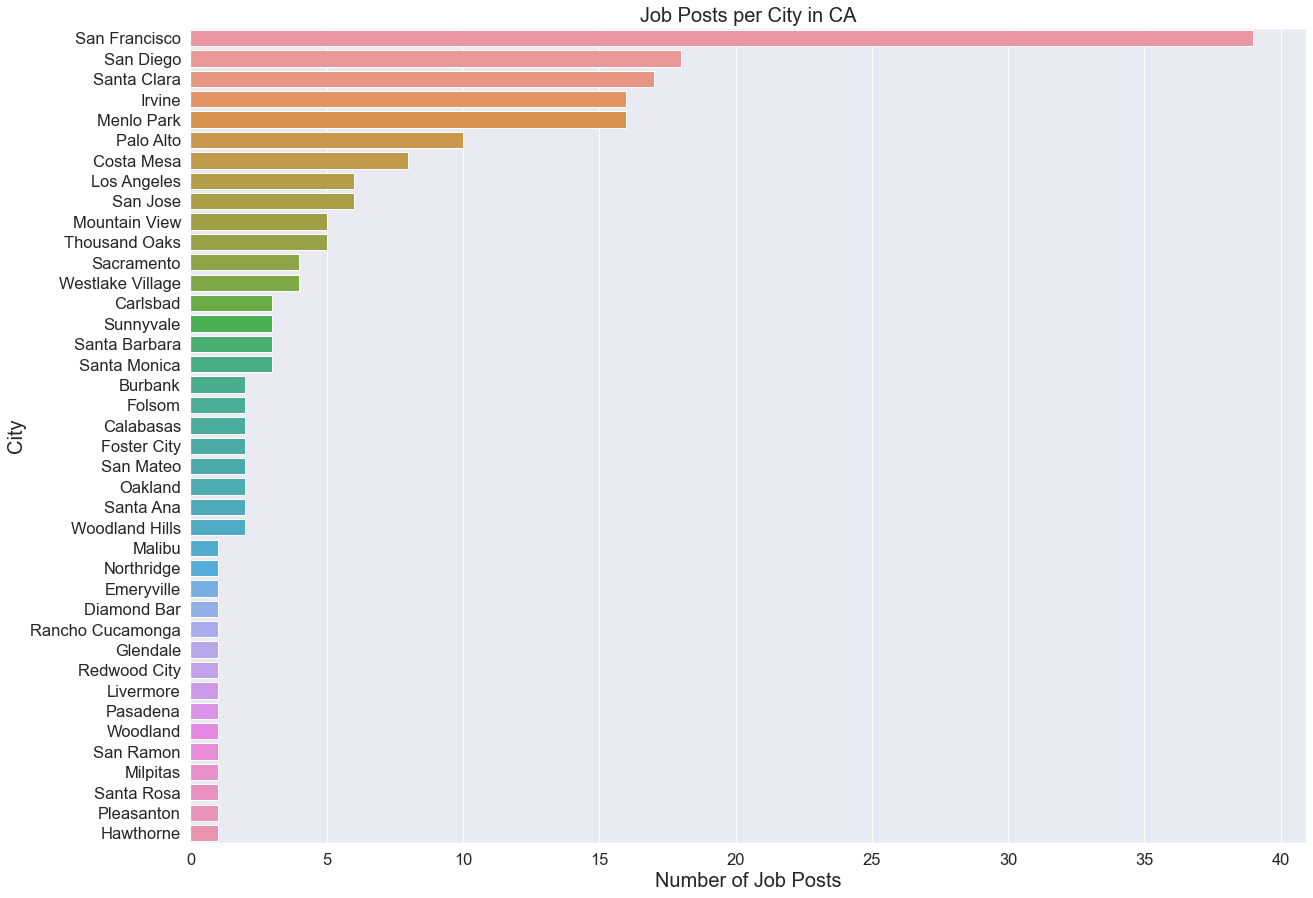

In [238]:
# Horizontal Bar Plot for job posts in CA.
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ax = sns.countplot(y="Location", data=df, order = df['Location'].value_counts().index)
plt.xlabel("Number of Job Posts",fontsize=20)
plt.ylabel("City",fontsize=20)
plt.title("Job Posts per City in CA", fontsize=20)


In [239]:
# We calcualte Job Postings per 100k.
df_per10k = df.groupby('Location').agg({'Title':'count','Population':'first'}) 
df_per10k['Jobs_per_100k'] = df_per10k.apply(lambda x: (x.Title/x.Population) * 100000, axis = 1)
df_per10k = df_per10k.sort_values(by='Jobs_per_100k', ascending=False)
df_per10k

,Title,Population,Jobs_per_100k
Location,,,
Westlake Village,4,8280,48.309179
Menlo Park,16,34949,45.780995
Palo Alto,10,66292,15.084776
Santa Clara,17,129972,13.079740
Calabasas,2,23918,8.361903
Emeryville,1,12002,8.331945
Malibu,1,12693,7.878358
Costa Mesa,8,115081,6.951625
Mountain View,5,84067,5.947637


Text(0.5, 1.0, 'Job Posts per 100k by Location in CA')

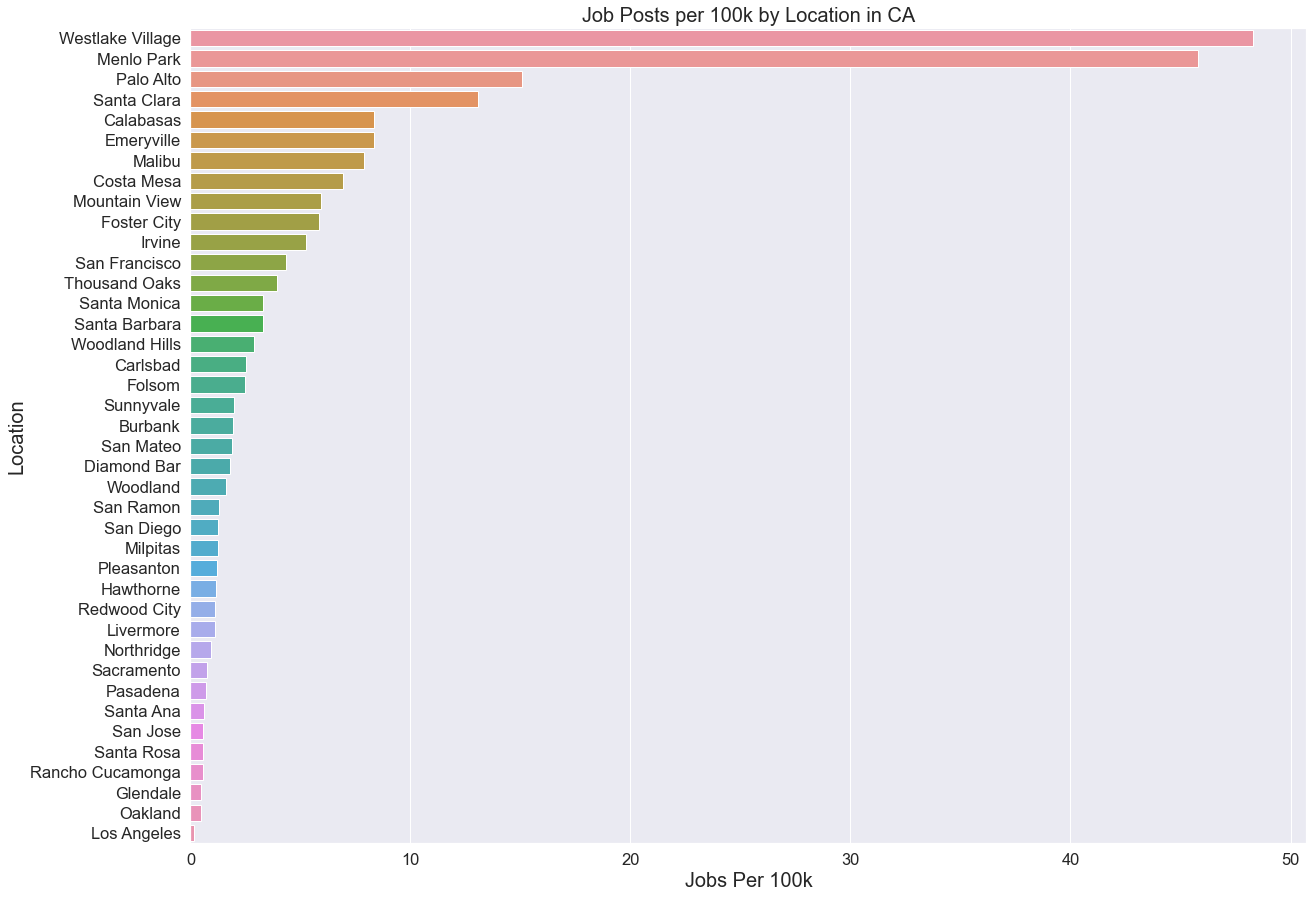

In [240]:
# Create a horizontal bar plot for jop posts per 100k in CA.
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ax = sns.barplot(y=df_per10k.index, x="Jobs_per_100k", data = df_per10k)
plt.xlabel("Jobs Per 100k",fontsize=20)
plt.ylabel("Location",fontsize=20)
plt.title("Job Posts per 100k by Location in CA", fontsize=20)

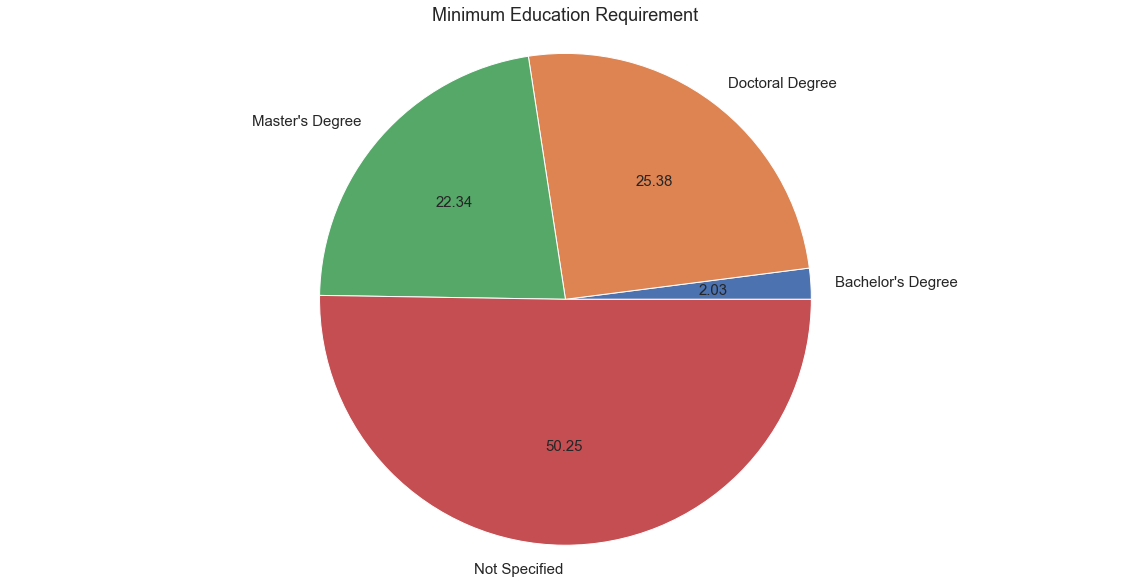

In [253]:
# Create pi chart for min education requirement.
plt.figure(figsize=(20,10))
min_ed_req = df.groupby(["Minimum Education"]).size().plot(kind='pie', autopct='%.2f',fontsize=15)
plt.axis('equal')
plt.title("Minimum Education Requirement", fontsize=18)
plt.ylabel("")
plt.show()

In [243]:
# This template below allows us to have a legend on our folium map. 
# Reference https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd
from branca.element import Template, MacroElement
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:blue;opacity:0.7;'></span>Not Specified</li>
    <li><span style='background:yellow;opacity:0.7;'></span>Bachelor\'s Degree</li>
    <li><span style='background:red;opacity:0.7;'></span>Master\'s Degree</li>
    <li><span style='background:green;opacity:0.7;'></span>Doctoral Degree</li>


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

In [258]:
import folium
import copy
from folium.plugins import MarkerCluster

# We take a copy of the original data frame
df_geo = copy.deepcopy(df)

# We create a list for each row in the dataframe.
geo_lst = df_geo.values.tolist()

# We create an empty list.
long_lat_lst = []

# We loop through the list and only append the long and lat values.
for i in geo_lst:
    long_lat_lst.append((i[-1],i[-2]))
    
# We draw a folium map.
m = folium.Map(location=[37.1915, -119.9889],
                        tiles='https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}{r}.png', attr='Stadia.AlidadeSmooth',
                        zoom_start = 6)



for j in range(len(long_lat_lst)):
        
        # We grab the infos that we want to add to the popup.
        title = df_geo.iloc[j, df_geo.columns.get_loc("Title")]
        company = df_geo.iloc[j, df_geo.columns.get_loc("Company")]
        location = df_geo.iloc[j, df_geo.columns.get_loc("Location")]
        min_edu = df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")]
        popup_text = "Job Title: {title} <br>""Company: {company} <br>""Location: {location} <br>""Minimum Education: {min_edu} <br>".format(title=title,company=company, location=location, min_edu = min_edu)

        
        # We check adjust the color of the of the data point based on the degree.
        if df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Not Specified':
            fill_col = 'blue'
        # Else the color will be red.
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Bachelor\'s Degree':
            fill_col = 'yellow'
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Master\'s Degree':
            fill_col = 'red'
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Doctoral Degree':
            fill_col = 'green'
        
        # We create the circles in the map. 
        folium.Circle(
        radius=100,
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        color = fill_col,
        popup = folium.Popup(popup_text, max_width=300,min_width=300),
        fill = True).add_to(m)
        
        
#         folium.CircleMarker(
#         radius=70,
#         location = [37.9975, -122.1869],
#         color = 'black',
#         fill = False).add_to(m)
        
        
#         folium.CircleMarker(
#         location = [33.9592, -118.4194],
#         radius=95,
#         color='black',
#         fill = False
#         ).add_to(m)

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)
m 

In [245]:
# This template below allows us to have a legend on our folium map. 
# Reference https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd
from branca.element import Template, MacroElement
template2 = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:green;opacity:0.7;'></span>Eligible To Apply</li>
    <li><span style='background:red;opacity:0.7;'></span>Not Eligible To Apply</li>


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

In [262]:
# We draw a folium map.
m2 = folium.Map(location=[37.1915, -119.9889],
                        tiles='https://tiles.stadiamaps.com/tiles/alidade_smooth_dark/{z}/{x}/{y}{r}.png', attr='Stadia.AlidadeSmoothDark',
                        zoom_start = 6)



for j in range(len(long_lat_lst)):
        
        # We grab the infos that we want to add to the popup.
        title = df_geo.iloc[j, df_geo.columns.get_loc("Title")]
        company = df_geo.iloc[j, df_geo.columns.get_loc("Company")]
        location = df_geo.iloc[j, df_geo.columns.get_loc("Location")]
        min_edu = df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")]
        popup_text = "Job Title: {title} <br>""Company: {company} <br>""Location: {location} <br>""Minimum Education: {min_edu} <br>".format(title=title,company=company, location=location, min_edu = min_edu)

        
        # We check adjust the color of the of the data point based on the degree.
        if df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Not Specified':
            fill_col = 'green'
        # Else the color will be red.
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Bachelor\'s Degree':
            fill_col = 'green'
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Master\'s Degree':
            fill_col = 'green'
        elif df_geo.iloc[j, df_geo.columns.get_loc("Minimum Education")] == 'Doctoral Degree':
            fill_col = 'red'
        
        # We create the circles in the map. 
        folium.Circle(
        radius=100,
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        color = fill_col,
        popup = folium.Popup(popup_text, max_width=300,min_width=300),
        fill = True).add_to(m2)
        
        
        
#         folium.CircleMarker(
#         radius=70,
#         location = [37.9975, -122.1869],
#         color = 'black',
#         fill = False).add_to(m)
        
        
#         folium.CircleMarker(
#                     location = [33.9592, -118.4194],
#                     radius=95,
#                     color='black',
#                     fill = False
#                     ).add_to(m)

macro2 = MacroElement()
macro2._template = Template(template2)

m2.get_root().add_child(macro2)
m2


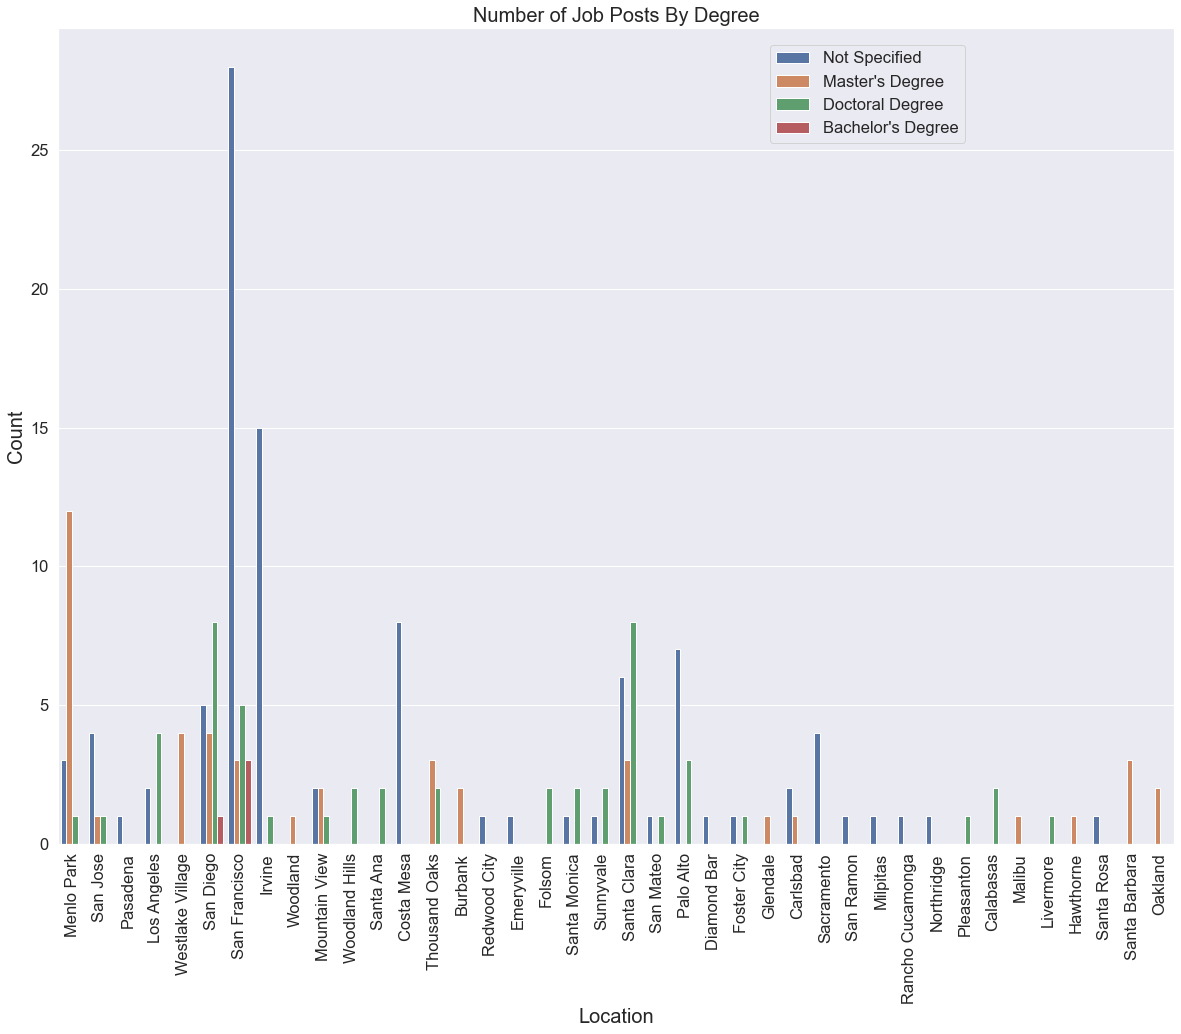

In [259]:
# Let's check the number of job posts by degree.
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
g= sns.countplot(x='Location',hue="Minimum Education",data=df)
plt.legend(bbox_to_anchor=(0.82, 0.99))
plt.xlabel("Location",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of Job Posts By Degree", fontsize=20)
_= g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.savefig('Number_Of_Jobs_By_Degree.png')

In [248]:
min_ed_series = df.groupby(["Minimum Education"]).size()
min_ed_series

Minimum Education
Bachelor's Degree     4
Doctoral Degree      50
Master's Degree      44
Not Specified        99
dtype: int64

In [249]:
df_min_ed = pd.DataFrame({'Eligible To Apply?':min_ed_series.index, 'Count':min_ed_series.values})

# We add bachelors + masters + not specified and set the sum to yes and doctoral count to no.
new_row1 = {'Eligible To Apply?':'Yes','Count':147}
new_row2 = {'Eligible To Apply?':'No','Count':50}
df_min_ed = df_min_ed.append(new_row1,ignore_index=True)
df_min_ed = df_min_ed.append(new_row2,ignore_index=True)
df_min_ed = df_min_ed.drop([0,1,2,3])
df_min_ed

,Eligible To Apply?,Count
4,Yes,147
5,No,50


Text(0.5, 1.0, 'Eligibility Status Plot')

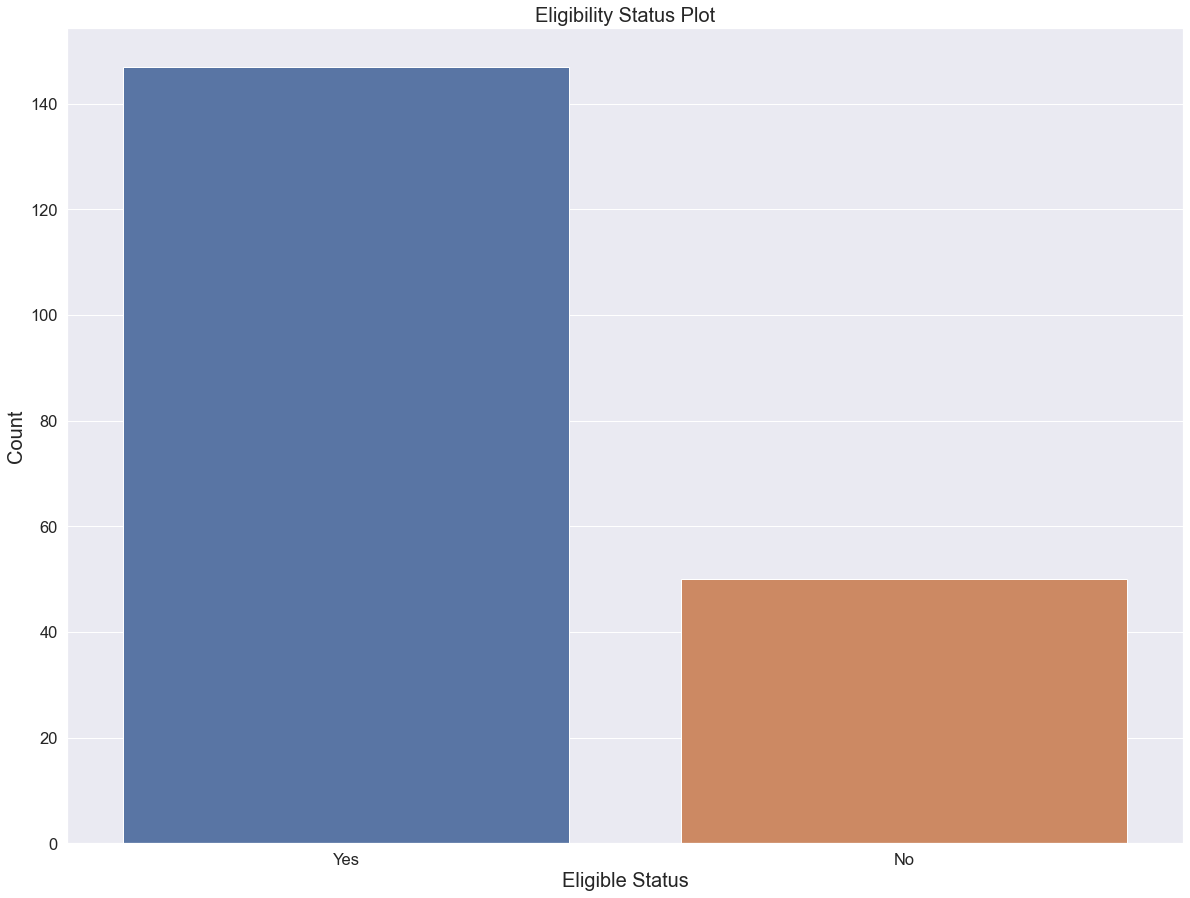

In [250]:
# Create a vertical bar plot for jop posts.
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ax = sns.barplot(x='Eligible To Apply?', y="Count", data = df_min_ed)
plt.xlabel("Eligible Status",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Eligibility Status Plot", fontsize=20)

In [251]:
# Lets check out the top 5 skills.
words = skills + tools 
words.append('r')
from prettytable import PrettyTable
p_table = PrettyTable()
p_table.field_names = ["Skill", "Count"]
for i in words:
    p_table.add_row([i,df[i].values.sum()])
p_table.sortby = "Count"
p_table.reversesort = True

print(p_table.get_string(start=0,end=5))




+------------------+-------+
|      Skill       | Count |
+------------------+-------+
|      python      |  148  |
| machine learning |  148  |
|     research     |  109  |
|    statistics    |   89  |
|       sql        |   71  |
+------------------+-------+
